# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [30]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(32561, 15)
(24420, 15)
(8141, 15)


In [20]:
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

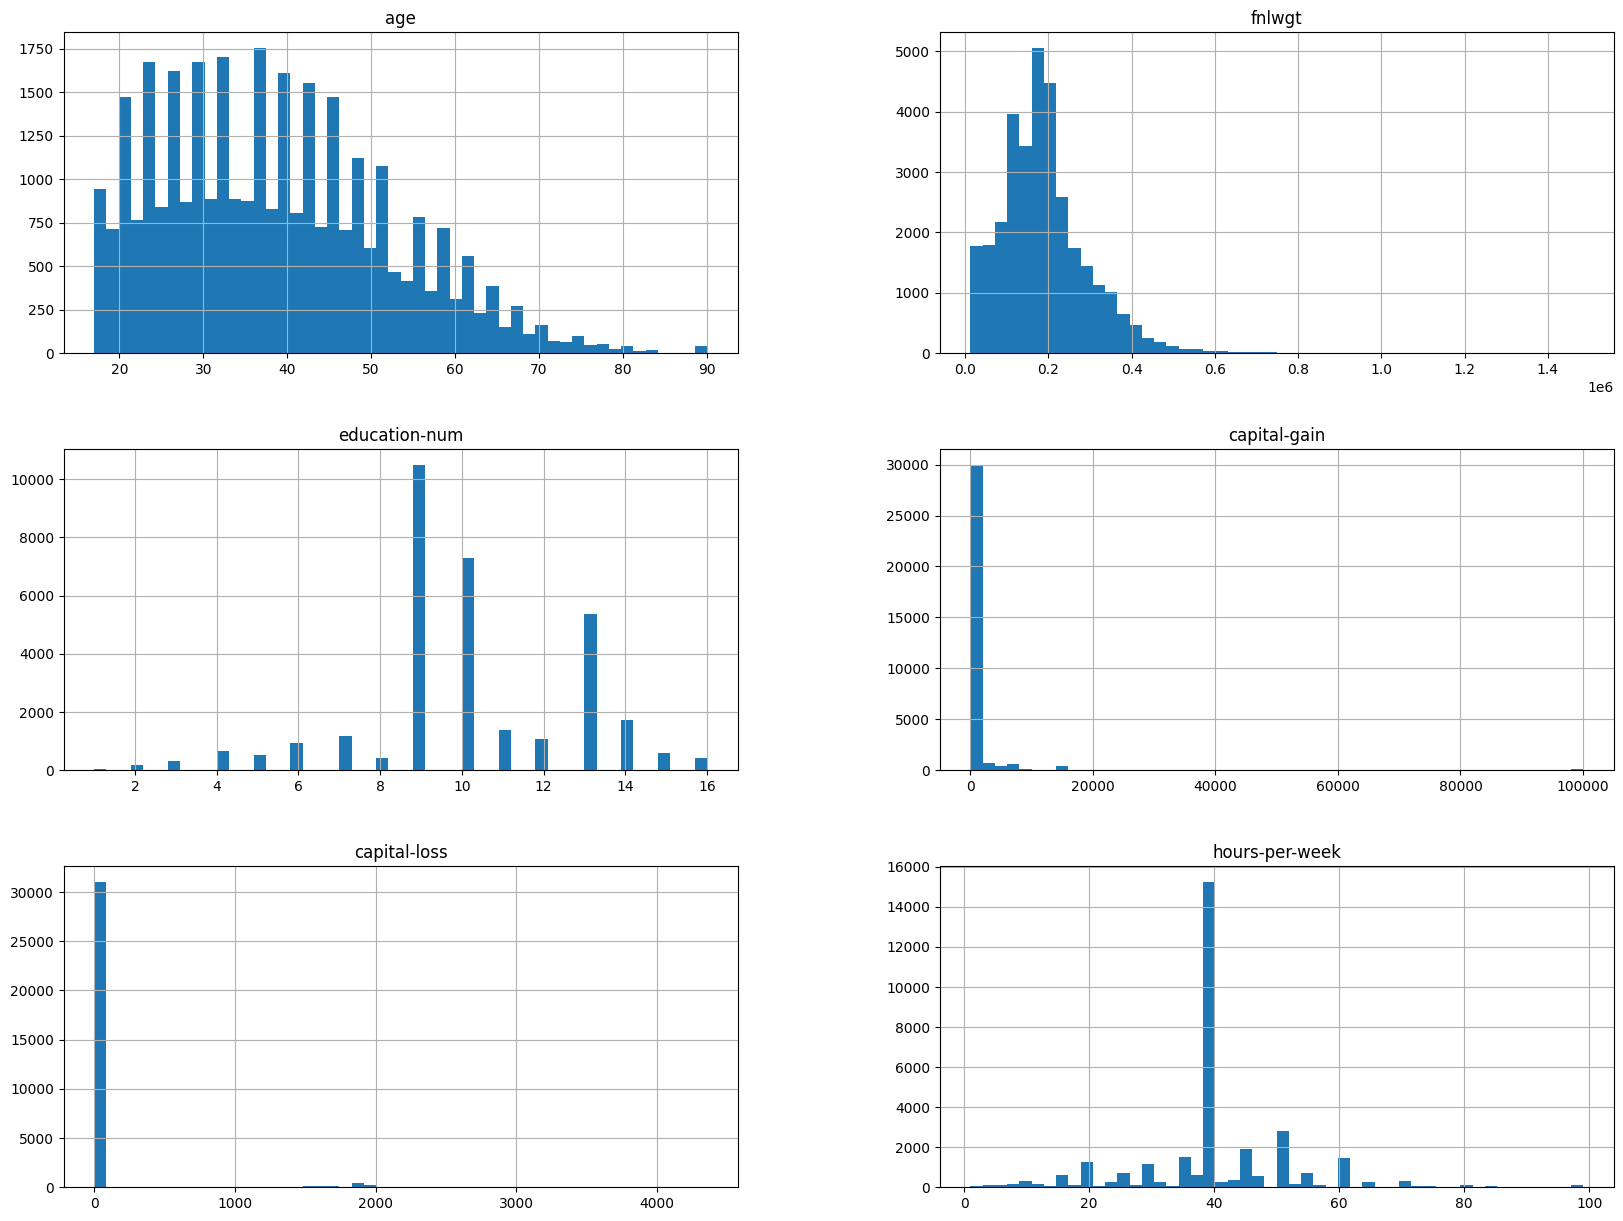

In [21]:
df.hist(bins=50, figsize=(20, 15))

In [22]:
print(df_train["workclass"].value_counts())
print("______________________________________________")
print(df_train["education"].value_counts())
print("______________________________________________")
print(df_train["marital-status"].value_counts())
print("______________________________________________")
print(df_train["occupation"].value_counts())
print("______________________________________________")
print(df_train["relationship"].value_counts())
print("______________________________________________")
print(df_train["race"].value_counts())
print("______________________________________________")
print(df_train["sex"].value_counts())
print("______________________________________________")
print(df_train["native-country"].value_counts())
print("______________________________________________")
print(df_train["target"].value_counts())

workclass
Private             16935
Self-emp-not-inc     1899
Local-gov            1635
?                    1364
State-gov            1000
Self-emp-inc          868
Federal-gov           703
Without-pay            12
Never-worked            4
Name: count, dtype: int64
______________________________________________
education
HS-grad         7847
Some-college    5439
Bachelors       4068
Masters         1299
Assoc-voc       1054
11th             876
Assoc-acdm       811
10th             689
7th-8th          472
Prof-school      410
9th              404
12th             334
Doctorate        303
5th-6th          240
1st-4th          131
Preschool         43
Name: count, dtype: int64
______________________________________________
marital-status
Married-civ-spouse       11268
Never-married             7996
Divorced                  3339
Separated                  776
Widowed                    723
Married-spouse-absent      299
Married-AF-spouse           19
Name: count, dtype: int64
______

In [23]:
df_train = df_train.replace(" ?", pd.NA)
df_test = df_test.replace(" ?", pd.NA)

df_train = df_train.dropna()
df_test = df_test.dropna()

print(df_train.shape)
print(df_test.shape)

(22644, 15)
(7518, 15)


In [24]:
x_train = df_train.drop("target", axis=1)
y_train = df_train["target"]

x_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22644, 14)
(7518, 14)
(22644,)
(7518,)


In [26]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns
numerical_attributes = x_train.select_dtypes(include=['int64']).columns

ct = sklearn.compose.ColumnTransformer(
    [
        ("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
        ("encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore") , categorical_attributes)
    ]
)

ct.fit(x_train)

x_train_transformed = ct.transform(x_train)
x_test_transformed = ct.transform(x_test)

print(x_train_transformed.shape)
print(x_test_transformed.shape)

(22644, 103)
(7518, 103)


In [28]:
model = sklearn.svm.SVC()
model.fit(x_train_transformed, y_train)

SVC()

In [32]:
y_predicated = model.predict(x_test_transformed)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicated)
print(accuracy*100,"%")

86.25964352221335 %
